### CFM 301 Data Assignment 3 Q5
#### Jeongseop Yi (j22yi)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [7]:
# Read the data
DA2_data = pd.read_excel('../downloads/DA2_data.xlsx', sheet_name="q6")

q4_data = pd.read_excel('../DA3_data.xlsx', sheet_name="Q4")

stock_m = pd.read_sas('../downloads/stock_m.sas7bdat')
stock_m.columns = map(str.upper, stock_m.columns)
stock_m['DATE'] = pd.to_datetime(stock_m['DATE'])
stock_m['MONTHID'] = (stock_m['DATE'].dt.year - 2000) * 12 + stock_m['DATE'].dt.month

# Merge the data
q5_data = pd.merge(stock_m[['PERMNO', 'MONTHID', 'RET', 'DATE']], q4_data[['PERMNO', 'MONTHID', 'BETA_W', 'IVOL_W', 'MOM_W']], on=['MONTHID', 'PERMNO'], how="outer")
q5_data = pd.merge(q5_data, DA2_data[['MONTHID', 'PERMNO', 'lnSize_W', 'bk2mkt_W', 'eP_W']], on=['MONTHID', 'PERMNO'], how="outer")

# lag the RET column
q5_data['RET_L'] = q5_data.groupby('PERMNO')['RET'].shift()
q5_data = q5_data[q5_data['MONTHID'] > 0]

cols = pd.DataFrame(columns=['BETA_W', 'IVOL_W', 'MOM_W', 'lnSize_W', 'bk2mkt_W', 'eP_W', 'RET_L'])

a)

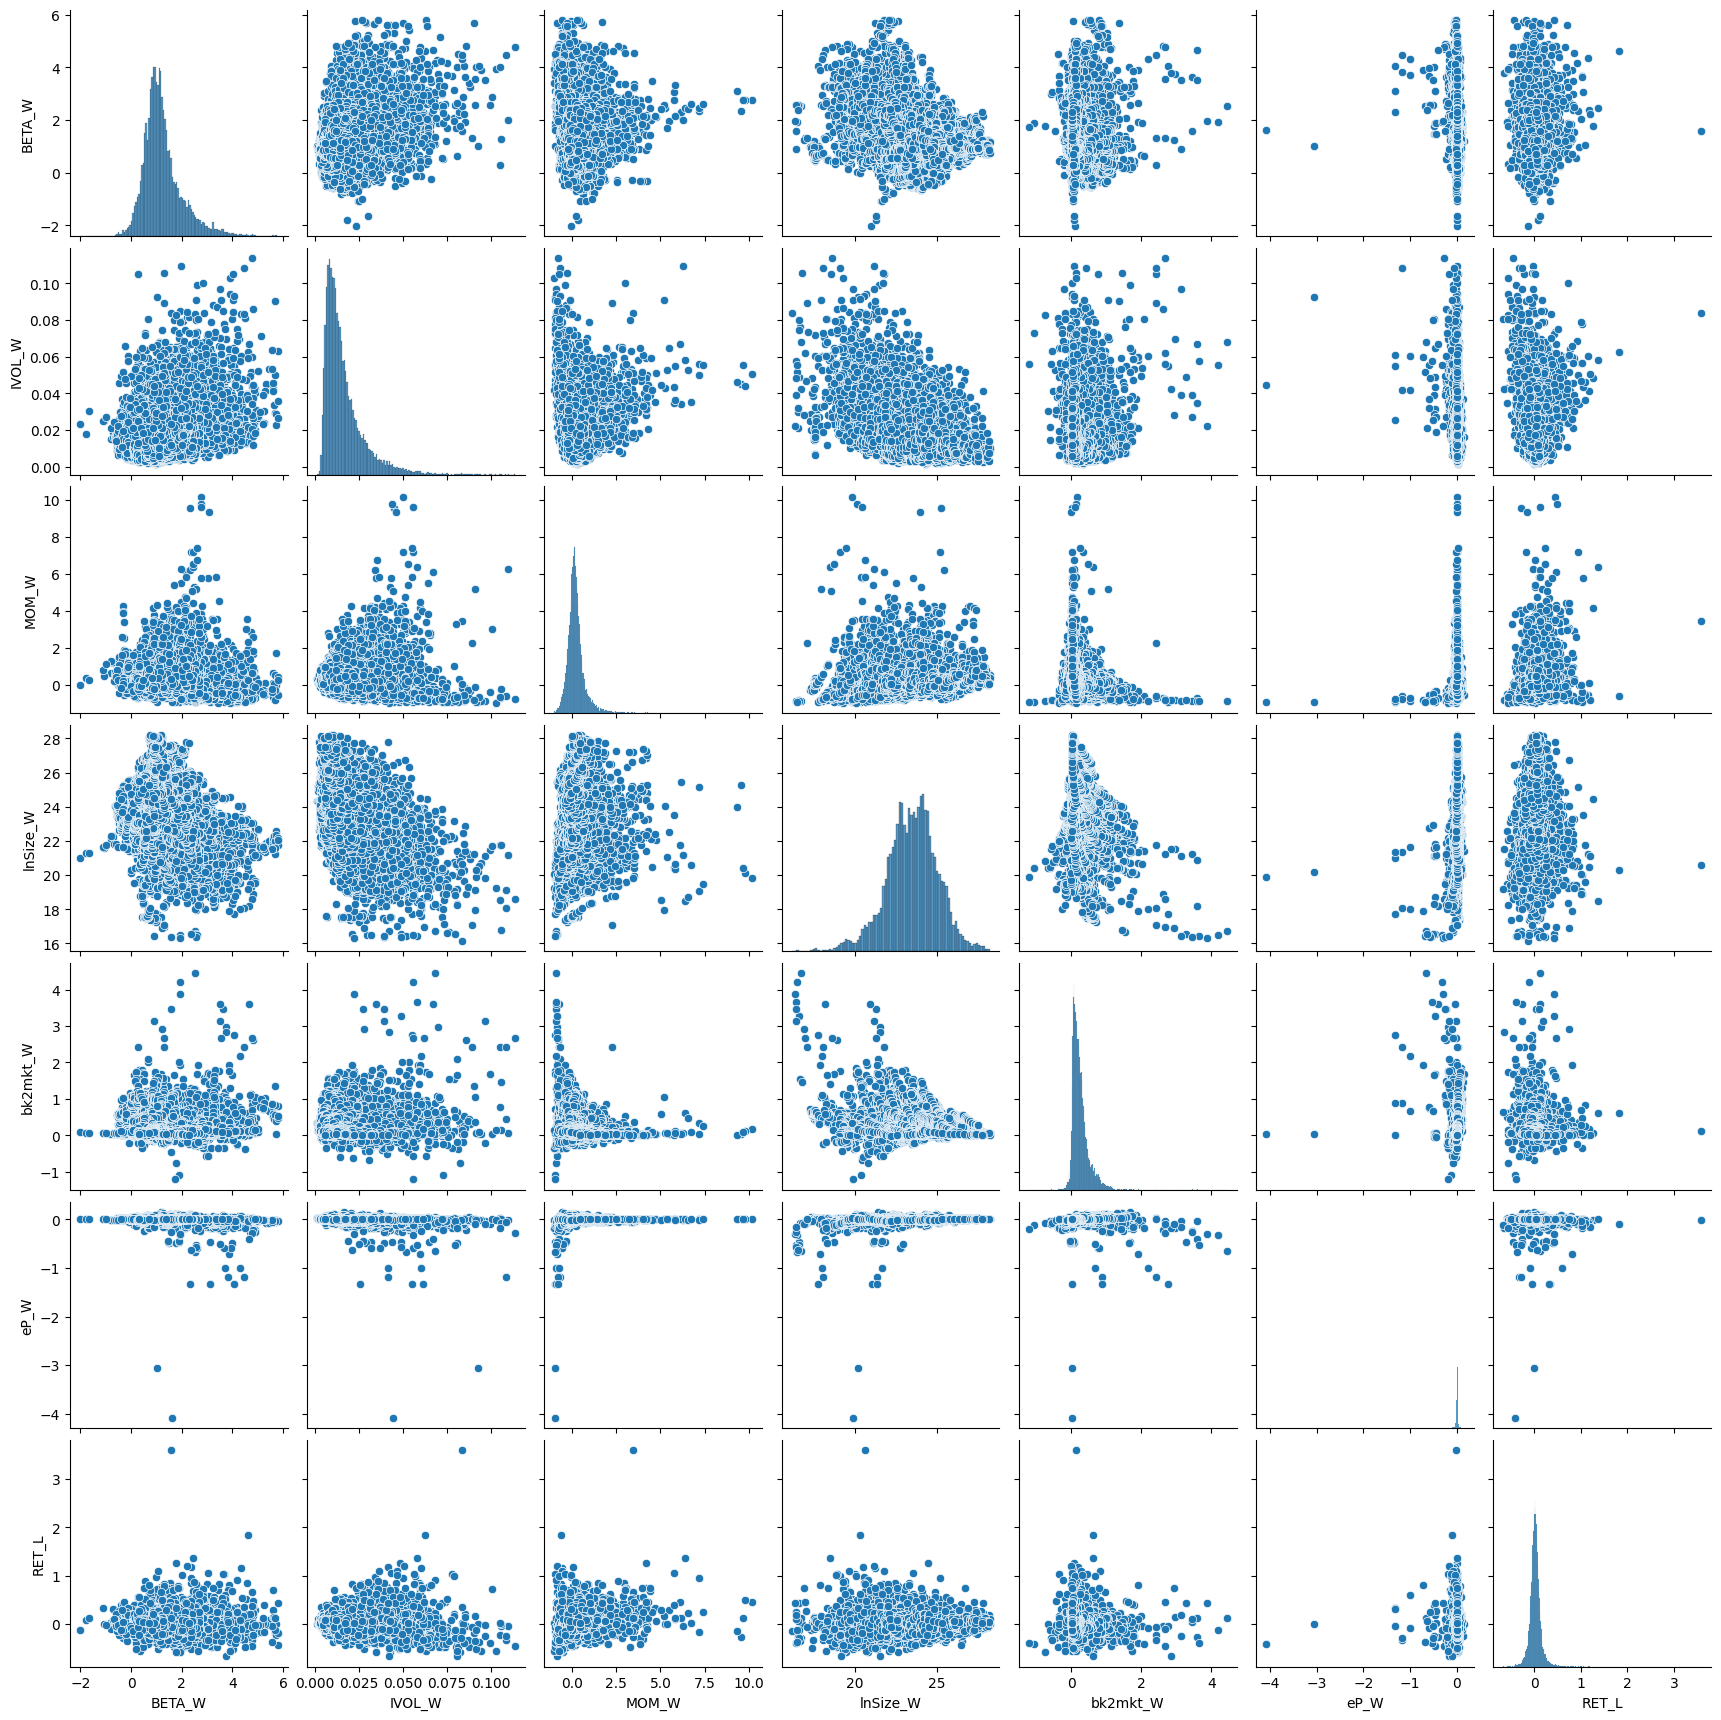

In [8]:
sns.pairplot(q5_data[cols.columns])

c)

In [9]:
display(round(q5_data[cols.columns].corr(), 6))
pvalues = cols.transpose().join(cols, how='outer')
for r in cols:
    for c in cols:
        model = sm.OLS(q5_data[r], sm.add_constant(q5_data[c]), missing='drop').fit()
        pvalues[r][c] = round(model.pvalues[c], 6)
display(pvalues)

,BETA_W,IVOL_W,MOM_W,lnSize_W,bk2mkt_W,eP_W,RET_L
BETA_W,1.000000,0.373041,0.019579,-0.293981,0.004506,-0.152358,0.003516
IVOL_W,0.373041,1.000000,0.075432,-0.434295,0.041815,-0.216811,-0.052344
MOM_W,0.019579,0.075432,1.000000,0.043115,-0.278687,0.052670,0.253463
lnSize_W,-0.293981,-0.434295,0.043115,1.000000,-0.176558,0.166766,0.007091
bk2mkt_W,0.004506,0.041815,-0.278687,-0.176558,1.000000,-0.058081,-0.093186
eP_W,-0.152358,-0.216811,0.052670,0.166766,-0.058081,1.000000,-0.003010
RET_L,0.003516,-0.052344,0.253463,0.007091,-0.093186,-0.003010,1.000000


,BETA_W,IVOL_W,MOM_W,lnSize_W,bk2mkt_W,eP_W,RET_L
BETA_W,0.0,0.0,0.005273,0.0,0.52298,0.0,0.616368
IVOL_W,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MOM_W,0.005273,0.0,0.0,0.0,0.0,0.0,0.0
lnSize_W,0.0,0.0,0.0,0.0,0.0,0.0,0.307408
bk2mkt_W,0.52298,0.0,0.0,0.0,0.0,0.0,0.0
eP_W,0.0,0.0,0.0,0.0,0.0,0.0,0.666267
RET_L,0.616368,0.0,0.0,0.307408,0.0,0.666267,0.0


In [10]:
with pd.ExcelWriter("../DA3_data.xlsx", mode='a', engine="openpyxl", if_sheet_exists='replace') as writer:
    q5_data.to_excel(writer, sheet_name="Q5", index=False)